In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log, cos
from qu_eig import *
import os

In [2]:
#----- Initializing Parameters
n = 50 # Size of Truncated Hilbert Spaces
##Frequencies in GHz
omega_c = 2*np.pi * 9.07
delta   = 2*np.pi * -1.0
g       = 2*np.pi * 0.2
kappa   = 2*np.pi * 0.001
## Derived Quantities
chi = g**2/delta
xi1 = kappa/sqrt(2)
## Generating time points for simulation
t_max = 2.5/kappa

In [3]:
#----- Setting up Operators and Hamiltonians
## Operators
I = identity(n)
a = destroy(n)
sz = -1.*I

##N = a.dag()*a + sz/2 + 1./2
N = number(n)
D = np.sqrt((delta**2)*I + 4*g**2*N)

## Hamiltonians
H0 = omega_c*(dag(a).dot(a)) + (omega_c*I-D).dot(sz/2)

H1 = a + dag(a)
def H1_coeff(t, args):
    xi = args['xi']
    omega_d = args['omega_d']
    return xi*np.cos(omega_d*t)/sqrt(2)

H = [H0, [H1, H1_coeff]]

In [4]:
#----- Setting up parameters for simulation
## Detuning
d_min, d_max, d_res = [-0.5, 1.5, 100]
d = np.linspace(d_min, d_max, num=d_res)
omega_d = d*abs(chi) + omega_c

## Drive Amplitude
xi = 6.3*xi1


## Setting up Expectation and Collapse Operators
e_op = a
c_op = sqrt(kappa)*a

## Setting up additional parameters for solver
numtraj = 100
cycleRes = 25

## Creating initial state
psi0 = fock(n, 0)

In [5]:
for i in range(omega_d.shape[0]):
    print('\nPoint: %d' %i)
    H1_args = {'xi':xi, 'omega_d':omega_d[i]}
    cyclePeriod = 2*np.pi/omega_d[i]
    cycleCount = int(t_max*omega_d[i]/(2*np.pi)) + 1
    %time data = eigSolve(H, psi0, cyclePeriod, cycleRes, cycleCount,\
                          c_op, e_op, [H1_args], numtraj)
    np.save(os.path.join('plotData',str(i)+'.npy'), data)


Point: 0
Number of Steps per Cycle: 25
Computing Time Step Operators
Total Progress: 100.0%
Done
Running Simulation
Total Progress: 100.0%
Complete
CPU times: user 6min 26s, sys: 6.32 s, total: 6min 33s
Wall time: 1min 38s

Point: 1
Number of Steps per Cycle: 25
Computing Time Step Operators
Total Progress: 100.0%
Done
Running Simulation
Total Progress: 100.0%
Complete
CPU times: user 6min 24s, sys: 6.37 s, total: 6min 30s
Wall time: 1min 37s

Point: 2
Number of Steps per Cycle: 25
Computing Time Step Operators
Total Progress: 100.0%
Done
Running Simulation
Total Progress: 100.0%
Complete
CPU times: user 6min 21s, sys: 6.05 s, total: 6min 27s
Wall time: 1min 36s

Point: 3
Number of Steps per Cycle: 25
Computing Time Step Operators
Total Progress: 100.0%
Done
Running Simulation
Total Progress: 100.0%
Complete
CPU times: user 6min 20s, sys: 6.11 s, total: 6min 26s
Wall time: 1min 36s

Point: 4
Number of Steps per Cycle: 25
Computing Time Step Operators
Total Progress: 100.0%
Done
Runnin

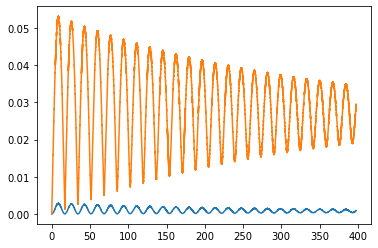

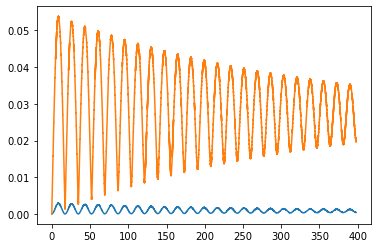

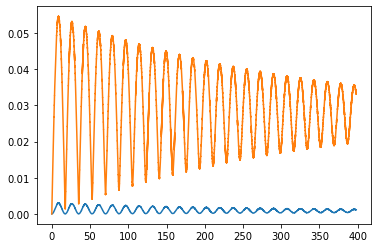

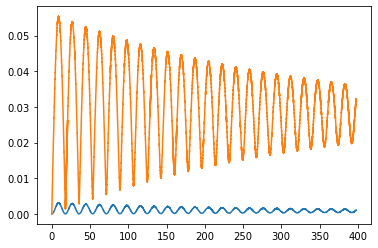

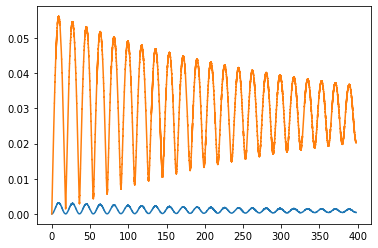

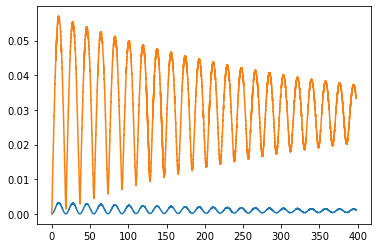

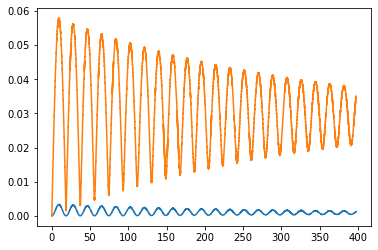

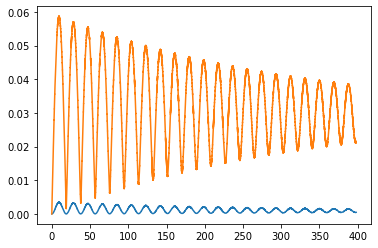

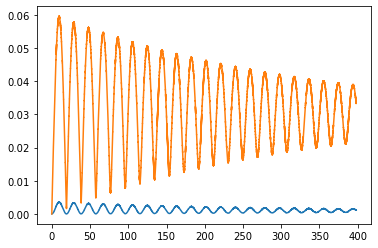

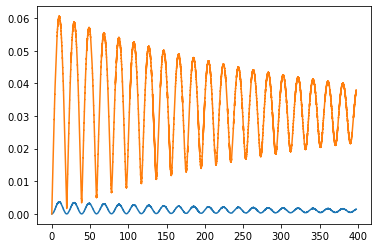

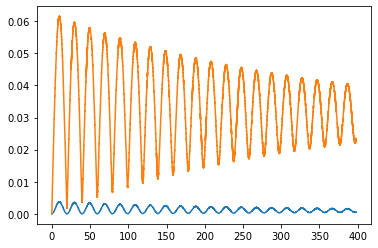

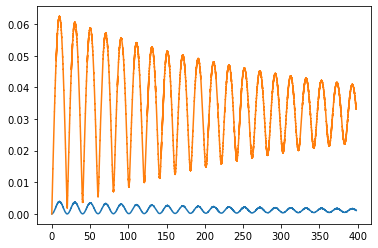

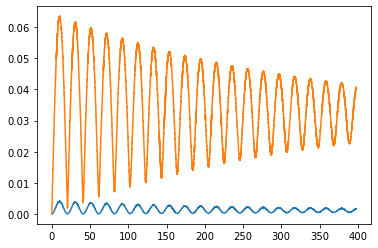

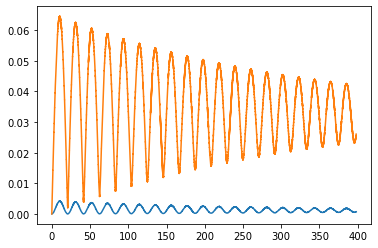

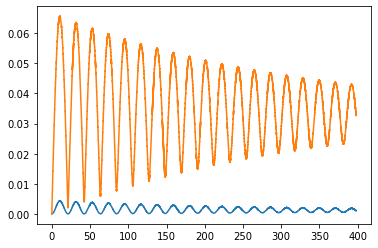

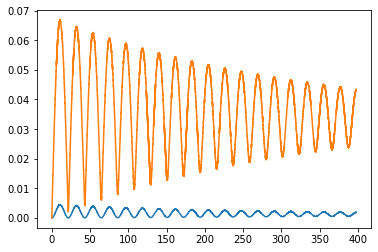

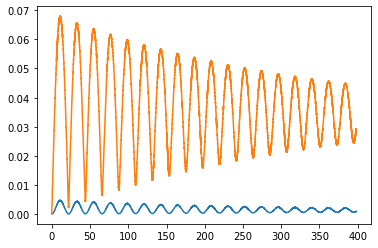

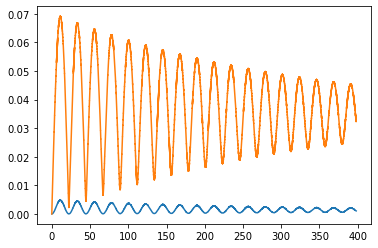

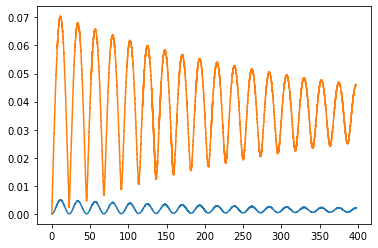

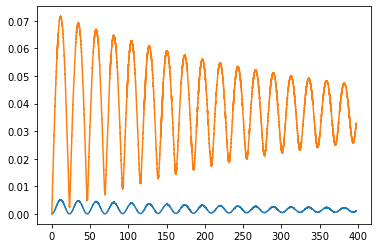

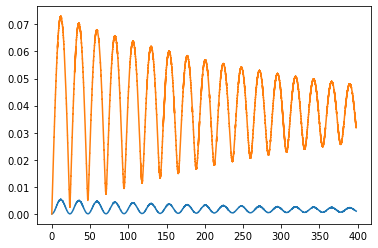

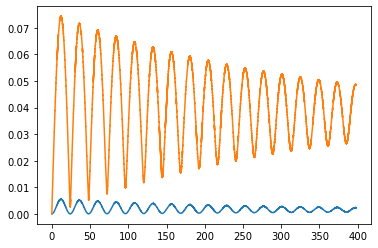

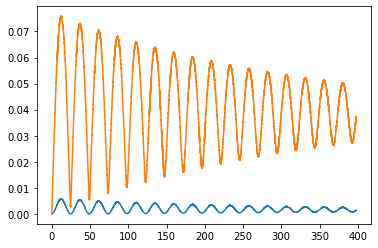

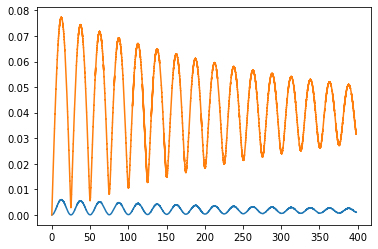

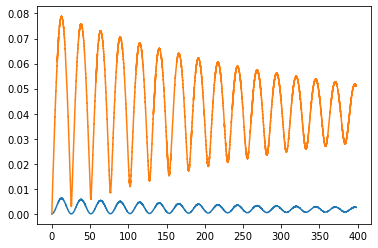

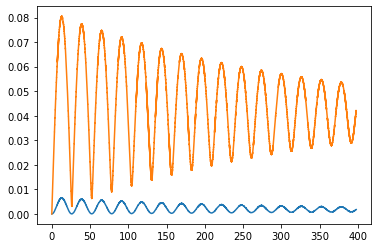

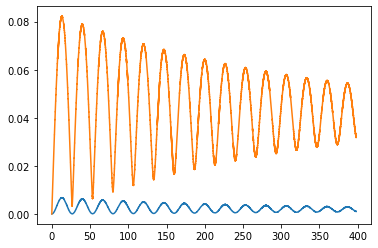

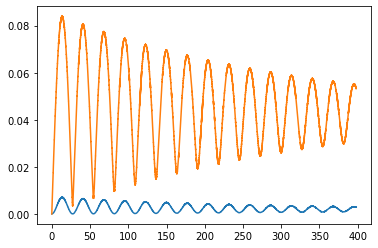

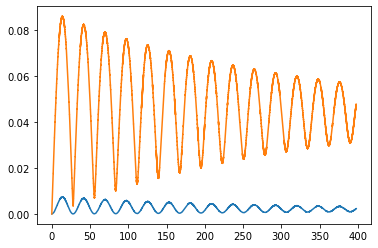

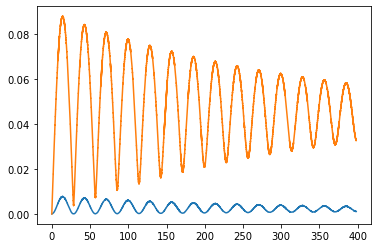

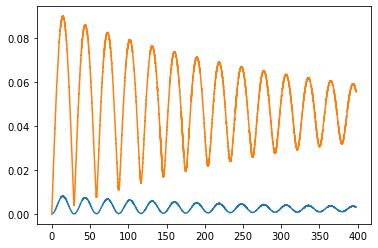

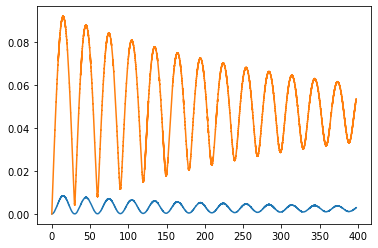

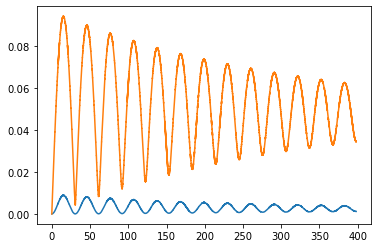

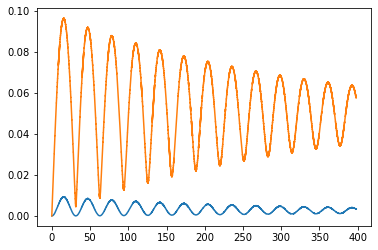

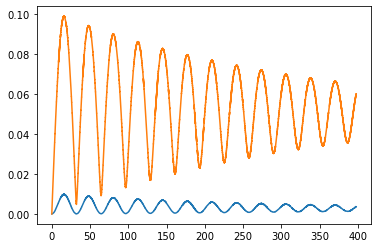

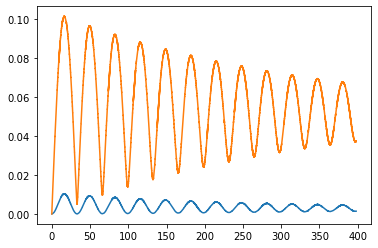

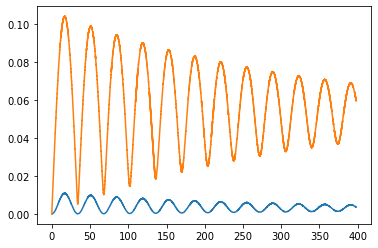

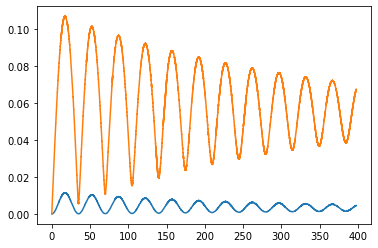

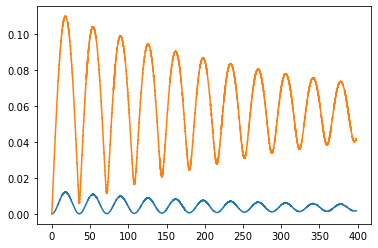

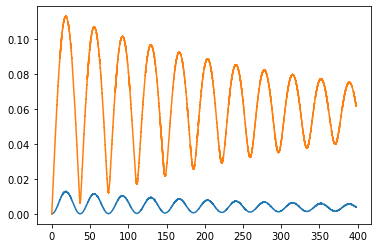

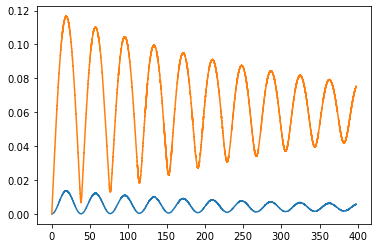

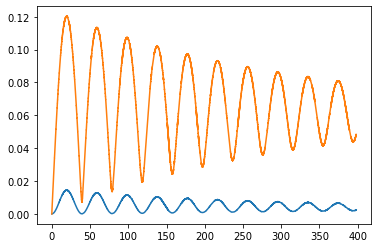

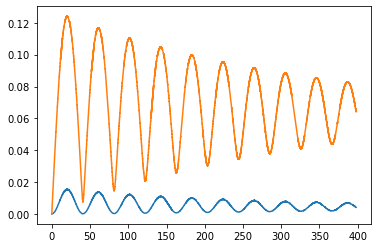

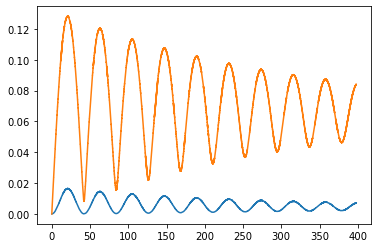

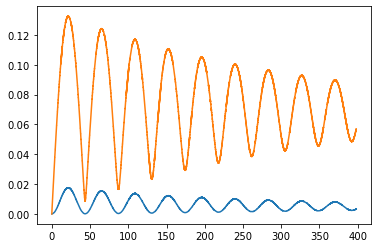

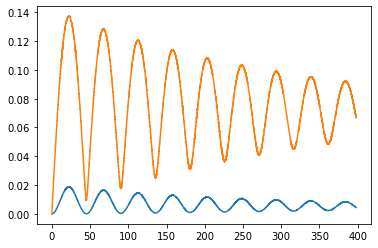

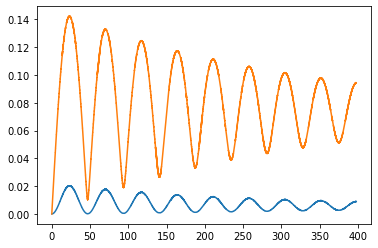

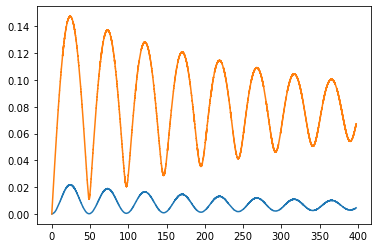

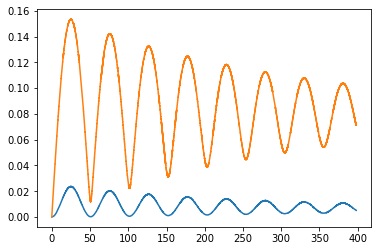

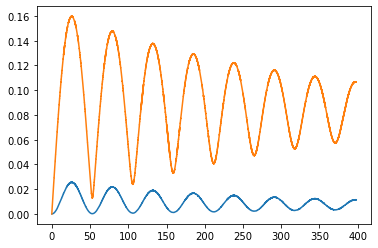

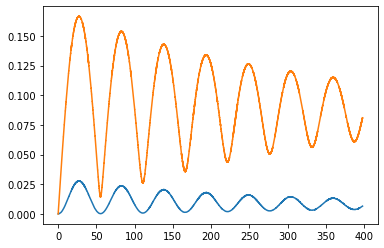

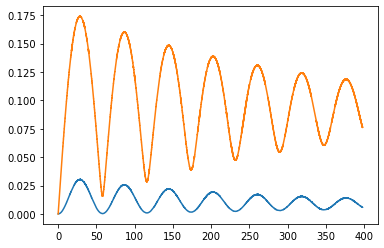

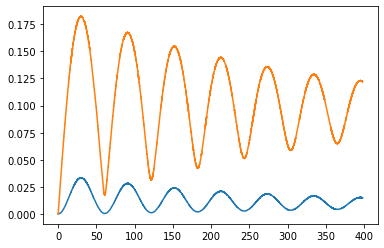

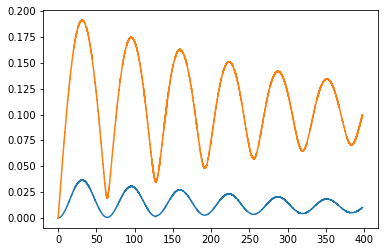

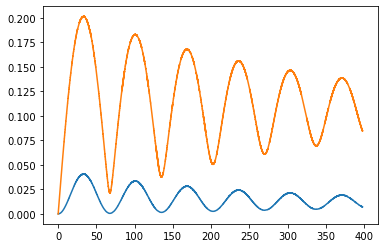

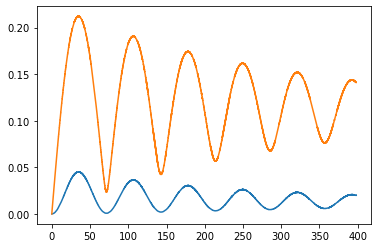

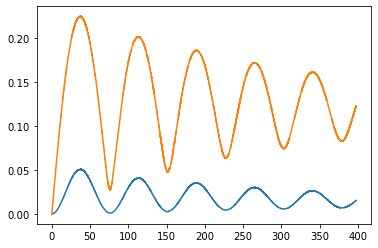

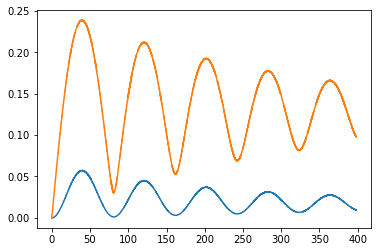

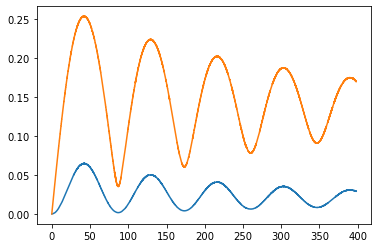

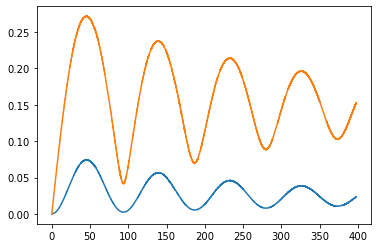

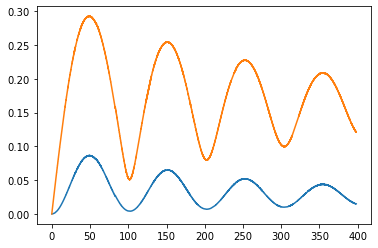

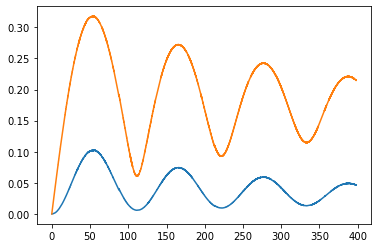

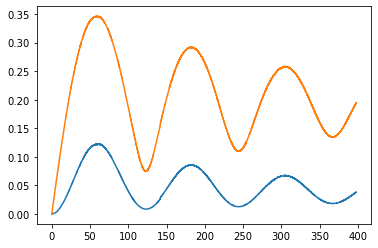

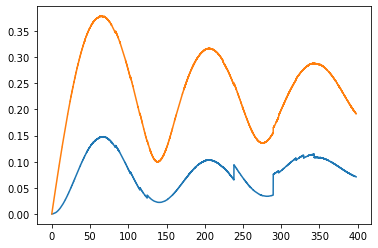

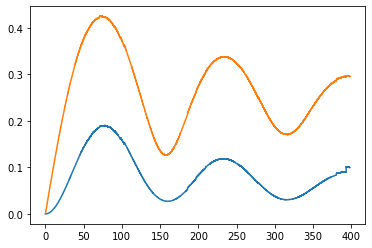

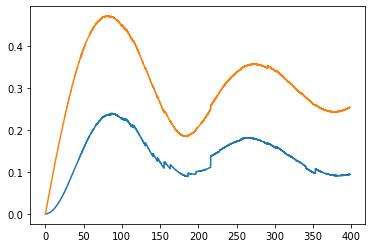

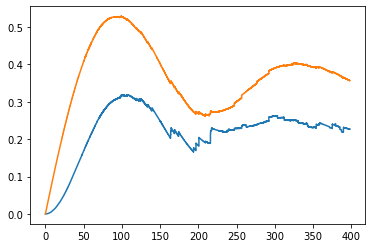

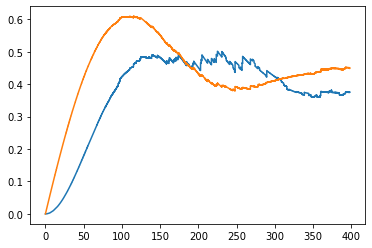

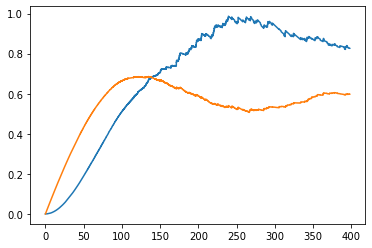

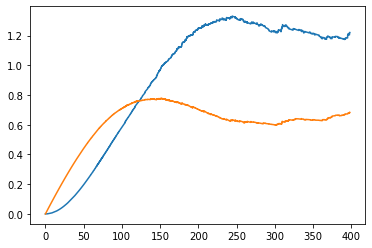

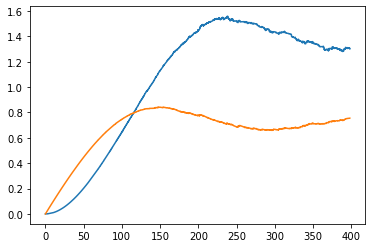

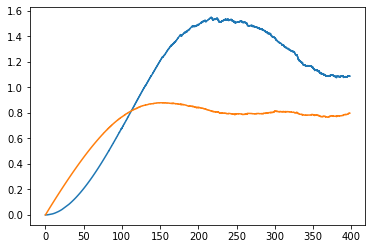

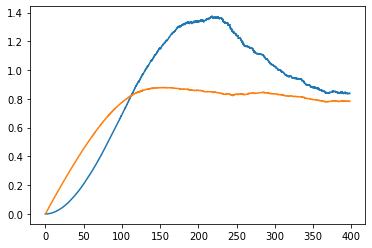

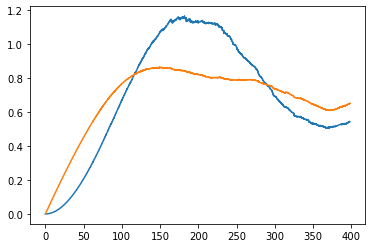

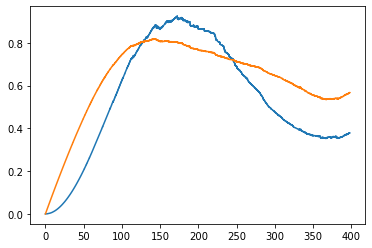

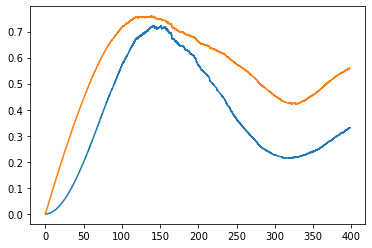

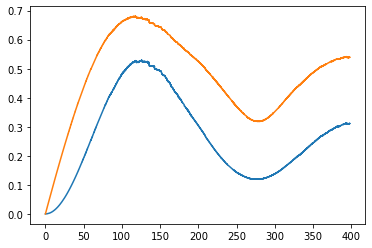

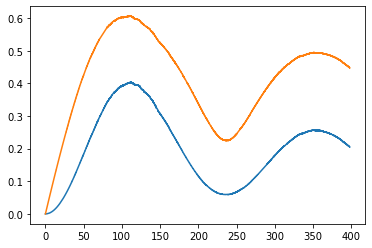

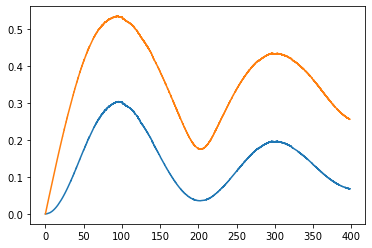

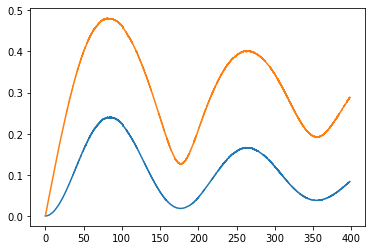

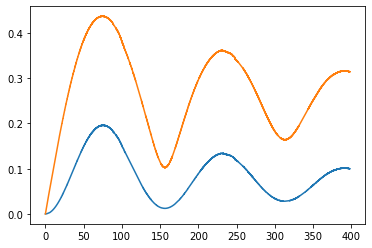

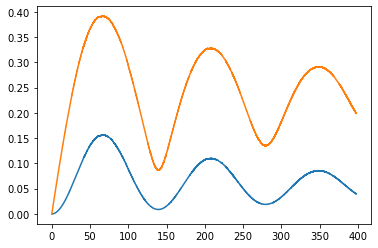

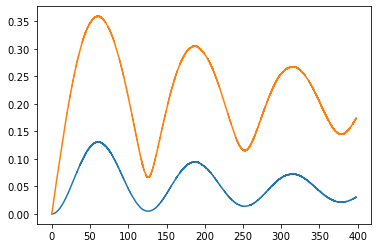

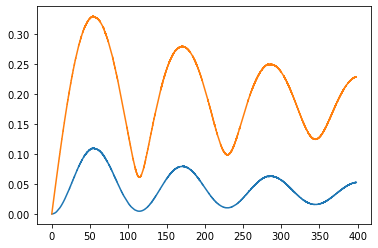

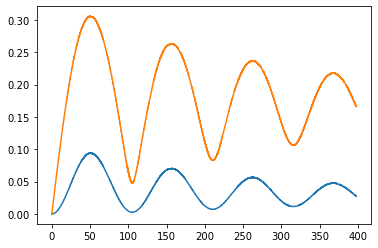

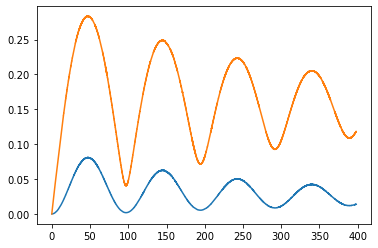

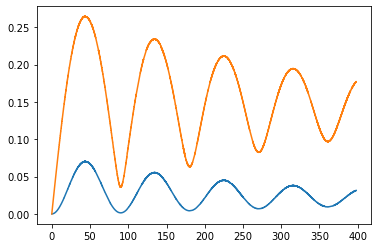

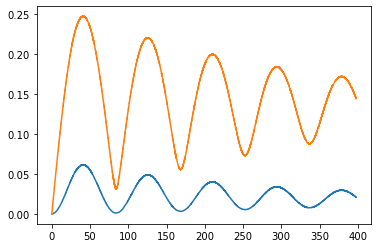

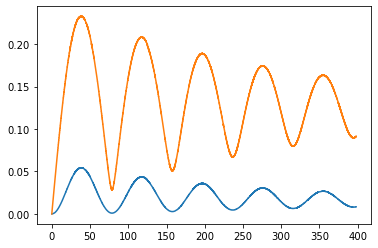

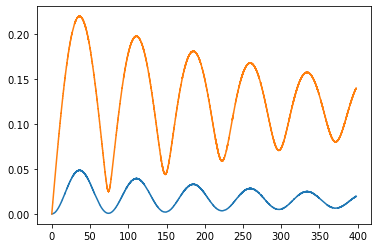

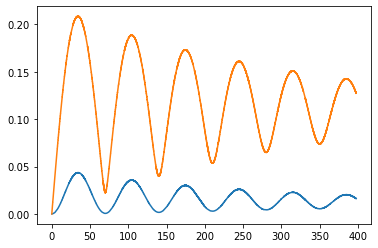

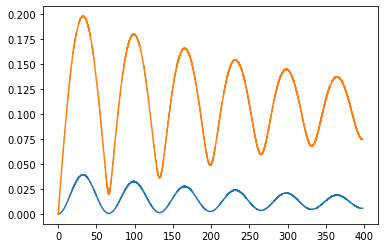

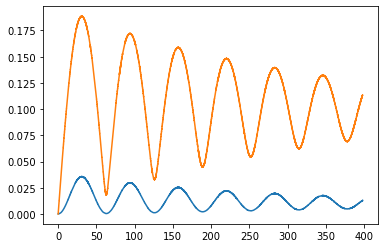

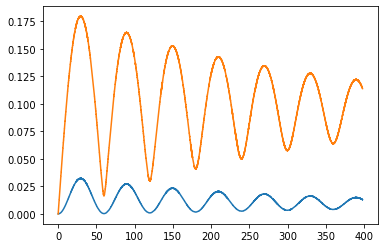

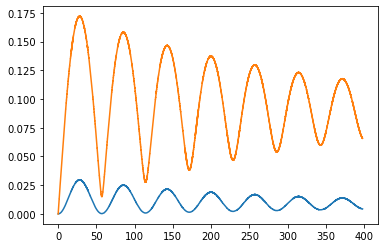

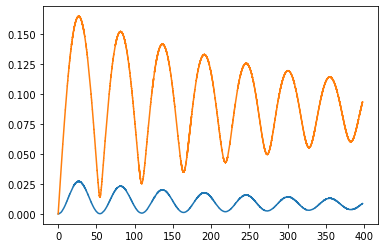

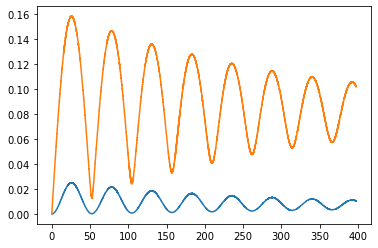

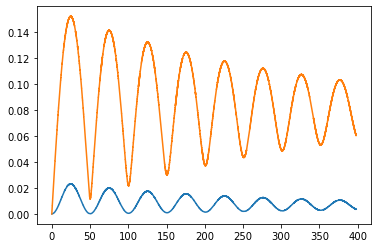

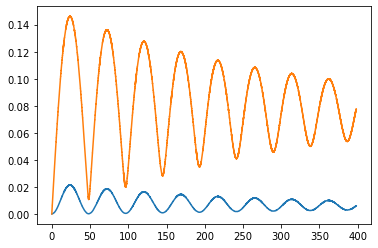

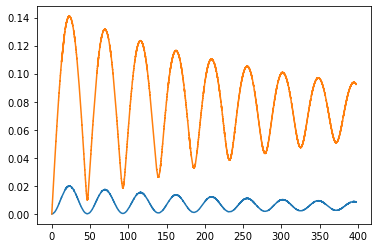

In [6]:
for i in range(d_res):
    data = np.load(os.path.join('plotData', str(i)+'.npy'))
    fig = plt.figure()
    plt.plot(data[:,0], data[:,1])
    plt.plot(data[:,0], data[:,2])
    plt.show()

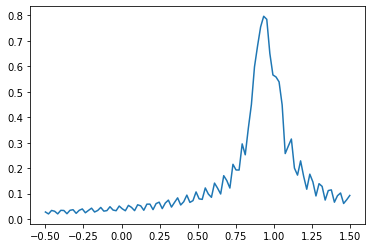

In [10]:
fig = plt.figure()
p = np.zeros((d_res,))
for i in range(d_res):
    data = np.load(os.path.join('plotData', str(i)+'.npy'))
    p[i] = np.mean(data[-cycleRes*10:,2])
plt.plot(d, p)
plt.show()

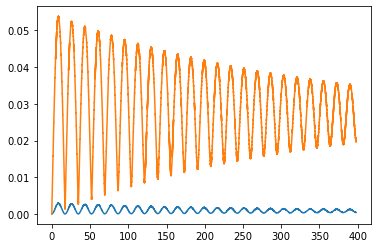

In [8]:
i=1
data = np.load(os.path.join('plotData', str(i)+'.npy'))
fig = plt.figure()
plt.plot(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,2])
plt.show()